WEEK-14, ASS NO-02

Q1. Explain the difference between simple linear regression and multiple linear regression. Provide an
example of each.

### Difference Between Simple Linear Regression and Multiple Linear Regression:

**1. Simple Linear Regression**:
   - **Definition**: Simple linear regression is a statistical method used to model the relationship between two variables: one independent variable (predictor) and one dependent variable (outcome). The goal is to find the best-fitting line that represents the relationship between these two variables.
   - **Equation**: The equation for simple linear regression is:
     \[
     y = \beta_0 + \beta_1 x + \epsilon
     \]
     Where:
     - \( y \) is the dependent variable (target)
     - \( x \) is the independent variable (predictor)
     - \( \beta_0 \) is the intercept (the value of \( y \) when \( x = 0 \))
     - \( \beta_1 \) is the slope of the line (change in \( y \) for a one-unit change in \( x \))
     - \( \epsilon \) is the error term (residuals)
   - **Example**: Suppose you want to predict a student’s exam score based on the number of hours they study. The model would be:
     \[
     \text{Exam Score} = \beta_0 + \beta_1 \times \text{Study Hours} + \epsilon
     \]
     Here, "Study Hours" is the independent variable, and "Exam Score" is the dependent variable. The model would help determine how changes in study time affect the exam score.

---

**2. Multiple Linear Regression**:
   - **Definition**: Multiple linear regression extends simple linear regression by modeling the relationship between one dependent variable and **two or more** independent variables. It aims to find a linear relationship between the dependent variable and multiple predictors.
   - **Equation**: The equation for multiple linear regression is:
     \[
     y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
     \]
     Where:
     - \( y \) is the dependent variable
     - \( x_1, x_2, \dots, x_n \) are the independent variables (predictors)
     - \( \beta_0 \) is the intercept
     - \( \beta_1, \beta_2, \dots, \beta_n \) are the coefficients (slopes for each independent variable)
     - \( \epsilon \) is the error term
   - **Example**: Suppose you want to predict a student’s exam score based on the number of hours they study **and** their sleep hours. The model would look like:
     \[
     \text{Exam Score} = \beta_0 + \beta_1 \times \text{Study Hours} + \beta_2 \times \text{Sleep Hours} + \epsilon
     \]
     Here, "Study Hours" and "Sleep Hours" are independent variables, and "Exam Score" is the dependent variable. This model helps determine how both study time and sleep time jointly affect exam scores.

---

### Key Differences:
| Feature                 | Simple Linear Regression                         | Multiple Linear Regression                     |
|-------------------------|--------------------------------------------------|------------------------------------------------|
| **Number of Predictors** | 1 predictor (independent variable)               | 2 or more predictors (independent variables)   |
| **Equation**             | \( y = \beta_0 + \beta_1 x + \epsilon \)         | \( y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon \) |
| **Interpretation**       | Analyzes the linear relationship between one predictor and the outcome | Analyzes the combined effect of multiple predictors on the outcome |
| **Example**              | Predict exam score based on study hours          | Predict exam score based on study hours and sleep hours |

 

Q2. Discuss the assumptions of linear regression. How can you check whether these assumptions hold in
a given dataset?

Linear regression relies on several key assumptions to ensure that the model provides valid and reliable results. These assumptions help in interpreting the model and ensuring the accuracy of predictions. Let’s break down each assumption and discuss how to check whether they hold in a given dataset.

### Assumptions of Linear Regression:

1. **Linearity**:
   - **Description**: The relationship between the independent variables (predictors) and the dependent variable (target) must be linear. The change in the dependent variable should be proportional to the change in the independent variables.
   - **How to Check**:
     - **Scatter Plot**: Create scatter plots of each independent variable against the dependent variable. A linear relationship should appear as a straight-line trend in the plot.
     - **Residuals Plot**: Plot the residuals (difference between predicted and actual values) against the predicted values. If the residuals show a random pattern (i.e., no distinct shape or curve), the linearity assumption is satisfied.
   
   ```python
   import matplotlib.pyplot as plt
   plt.scatter(predicted_values, residuals)
   plt.title("Residuals vs Fitted")
   plt.xlabel("Predicted Values")
   plt.ylabel("Residuals")
   plt.show()
   ```

---

2. **Independence of Errors (No Autocorrelation)**:
   - **Description**: The residuals (errors) should be independent of each other. In other words, the errors for one observation should not be correlated with the errors for another observation. This assumption is crucial in time-series data where errors may exhibit autocorrelation.
   - **How to Check**:
     - **Durbin-Watson Test**: This test helps detect the presence of autocorrelation in residuals. A value close to 2 indicates no autocorrelation, while values significantly less than 2 or greater than 2 suggest positive or negative autocorrelation, respectively.
   
   ```python
   from statsmodels.stats.stattools import durbin_watson
   durbin_watson(residuals)
   ```

---

3. **Homoscedasticity**:
   - **Description**: The residuals should have constant variance (homoscedasticity) across all levels of the independent variables. If the variance of the residuals changes at different levels of the predicted values (heteroscedasticity), the model may produce inefficient estimates.
   - **How to Check**:
     - **Residuals Plot**: Plot the residuals versus the predicted values. If the residuals are randomly dispersed around zero and show a constant spread, homoscedasticity is satisfied. If there is a "funnel" shape (widening or narrowing), this indicates heteroscedasticity.
     - **Breusch-Pagan Test**: A formal statistical test to check for heteroscedasticity.
   
   ```python
   from statsmodels.stats.diagnostic import het_breuschpagan
   test_stat, p_value, _, _ = het_breuschpagan(residuals, model.exog)
   print(f'Breusch-Pagan Test p-value: {p_value}')
   ```

---

4. **Normality of Errors**:
   - **Description**: The residuals (errors) should be normally distributed. This assumption is crucial for hypothesis testing (e.g., confidence intervals and p-values) and making accurate predictions. However, this assumption is less critical for large datasets due to the Central Limit Theorem.
   - **How to Check**:
     - **Histogram of Residuals**: Plot a histogram of the residuals to see if they follow a bell-shaped (normal) distribution.
     - **Q-Q Plot**: A quantile-quantile plot compares the distribution of the residuals to a normal distribution. If the residuals lie close to the 45-degree line, the normality assumption is likely satisfied.
     - **Shapiro-Wilk Test**: A formal statistical test for normality, where a high p-value indicates normality.
   
   ```python
   import scipy.stats as stats
   stats.probplot(residuals, dist="norm", plot=plt)
   plt.show()
   ```

---

5. **No Multicollinearity**:
   - **Description**: In multiple linear regression, the independent variables should not be highly correlated with each other. Multicollinearity inflates the variance of the coefficient estimates, leading to unstable estimates and difficulties in interpreting the model.
   - **How to Check**:
     - **Variance Inflation Factor (VIF)**: Calculate the VIF for each predictor. A VIF value above 5 (sometimes 10) indicates high multicollinearity.
     - **Correlation Matrix**: Check the correlation between independent variables. High correlations (e.g., above 0.8) suggest multicollinearity.
   
   ```python
   from statsmodels.stats.outliers_influence import variance_inflation_factor
   vif = pd.DataFrame()
   vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   vif["features"] = X.columns
   print(vif)
   ```

---

### Summary of Assumptions and How to Check Them:

| **Assumption**           | **How to Check**                                                                 |
|--------------------------|----------------------------------------------------------------------------------|
| **Linearity**             | Scatter plots, residuals vs. fitted plot                                         |
| **Independence of Errors**| Durbin-Watson test, check for autocorrelation                                    |
| **Homoscedasticity**      | Residuals vs. predicted plot, Breusch-Pagan test                                 |
| **Normality of Errors**   | Histogram of residuals, Q-Q plot, Shapiro-Wilk test                              |
| **No Multicollinearity**  | Variance Inflation Factor (VIF), correlation matrix                              |

---

### What to Do if Assumptions are Violated:

- **Non-linearity**: Consider applying transformations (e.g., log, square root) or using polynomial regression.
- **Autocorrelation**: For time-series data, consider using techniques like ARIMA (AutoRegressive Integrated Moving Average) or adding lag variables.
- **Heteroscedasticity**: Use weighted least squares (WLS) or apply data transformations to stabilize variance.
- **Non-normality of Errors**: If normality is violated, you can use non-parametric methods or apply transformations to the target variable.
- **Multicollinearity**: Drop highly correlated predictors, use principal component analysis (PCA), or apply regularization techniques like Ridge or Lasso regression.

 

Q3. How do you interpret the slope and intercept in a linear regression model? Provide an example using
a real-world scenario.

In a **linear regression model**, the slope and intercept have specific interpretations that describe the relationship between the independent variable(s) and the dependent variable.

### 1. **Intercept (\( \beta_0 \))**:
   - The intercept represents the expected value of the **dependent variable** when all the independent variables are zero. In simple terms, it is where the regression line crosses the y-axis.
   - **Interpretation**: The intercept is the predicted value of the dependent variable when the independent variable(s) is zero.
   - **Real-World Example**: Suppose you are modeling the relationship between the number of hours studied and exam score. If the regression model gives an intercept of 50, it means that a student who studies for zero hours is expected to score 50 on the exam.
   
   \[
   \text{Exam Score} = 50 + 5 \times \text{Study Hours}
   \]
   In this case, the intercept (50) tells you that even if a student doesn’t study at all, they are expected to score 50 points.

---

### 2. **Slope (\( \beta_1 \))**:
   - The slope represents the **change** in the dependent variable for a **one-unit change** in the independent variable. It indicates the rate at which the dependent variable changes with respect to the independent variable.
   - **Interpretation**: For each additional unit of the independent variable, the dependent variable changes by the value of the slope.
   - **Real-World Example**: Continuing with the same example of hours studied and exam score, suppose the slope of the regression line is 5. This means that for every additional hour a student spends studying, their exam score is expected to increase by 5 points.
   
   \[
   \text{Exam Score} = 50 + 5 \times \text{Study Hours}
   \]
   Here, the slope (5) tells you that for each extra hour of study, the student is expected to increase their exam score by 5 points.

---

### Example of a Real-World Scenario:

Let’s take the scenario of predicting **monthly salary** based on **years of experience**. Suppose the regression equation is:
\[
\text{Salary} = 30,000 + 2,000 \times \text{Years of Experience}
\]

- **Intercept (\( \beta_0 = 30,000 \))**: This means that even with **zero years of experience**, an employee is expected to earn a starting salary of $30,000. The intercept represents a baseline salary that doesn’t depend on experience.
  
- **Slope (\( \beta_1 = 2,000 \))**: The slope indicates that for each additional year of experience, the employee’s salary is expected to increase by $2,000. This shows how work experience influences salary growth.

### Interpretation:
- If an employee has **5 years of experience**, their predicted salary would be:
  \[
  \text{Salary} = 30,000 + 2,000 \times 5 = 40,000
  \]
  So, an employee with 5 years of experience is expected to earn $40,000.

- If another employee has **10 years of experience**, their predicted salary would be:
  \[
  \text{Salary} = 30,000 + 2,000 \times 10 = 50,000
  \]
  This employee with 10 years of experience is expected to earn $50,000.

 

Q4. Explain the concept of gradient descent. How is it used in machine learning?

### What is Gradient Descent?

**Gradient Descent** is an optimization algorithm used to minimize a cost function (or loss function) by iteratively adjusting the parameters (weights) of a model. In machine learning, it is most commonly used to find the optimal parameters in models like linear regression, logistic regression, and neural networks.

The goal of gradient descent is to find the parameters that minimize the error (difference between predicted and actual values). It does this by taking steps proportional to the negative of the gradient of the cost function with respect to the model’s parameters.

### How Gradient Descent Works:

1. **Initialize Parameters**: 
   - Start by initializing the model parameters (e.g., weights in a linear model) with random values or zeros.
   
2. **Calculate the Cost Function**:
   - The cost function measures how far off the model’s predictions are from the actual values. For example, in linear regression, we use the **Mean Squared Error (MSE)** as the cost function:
     \[
     J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
     \]
     Where \( J(\theta) \) is the cost function, \( h_\theta(x) \) is the hypothesis (predicted value), \( y^{(i)} \) is the actual value, and \( m \) is the number of training examples.
   
3. **Compute the Gradient**:
   - The gradient is the derivative of the cost function with respect to the parameters. It tells us the direction and rate of change of the cost function for each parameter.
   - The gradient for parameter \( \theta_j \) is given by:
     \[
     \frac{\partial J(\theta)}{\partial \theta_j}
     \]
     This tells us how much the cost function would change if we tweak parameter \( \theta_j \).

4. **Update the Parameters**:
   - The parameters are updated by moving in the opposite direction of the gradient (hence "descent"). The step size is controlled by a **learning rate** \( \alpha \).
   - The update rule is:
     \[
     \theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
     \]
     Where \( \alpha \) is the learning rate (a small positive value like 0.01 or 0.001), which determines how large a step we take in each iteration.

5. **Iterate Until Convergence**:
   - This process is repeated iteratively until the cost function converges to a minimum, meaning the parameters are optimal, and the model fits the data well.

### Types of Gradient Descent:

1. **Batch Gradient Descent**:
   - Uses the entire dataset to compute the gradient for each update. While this ensures stable updates, it can be slow for large datasets.
   - **Pros**: Stable convergence.
   - **Cons**: Computationally expensive for large datasets.

2. **Stochastic Gradient Descent (SGD)**:
   - Instead of using the entire dataset, SGD updates the parameters using one training example at a time. This makes it faster but introduces more noise into the updates, which can cause the algorithm to jump around and not converge smoothly.
   - **Pros**: Faster updates, useful for large datasets.
   - **Cons**: More variance, less stable convergence.

3. **Mini-batch Gradient Descent**:
   - A compromise between batch gradient descent and SGD. It updates the parameters using a small batch of training examples. This approach balances speed and stability.
   - **Pros**: Faster than batch gradient descent and more stable than SGD.

### Gradient Descent in Machine Learning:

In machine learning, **gradient descent** is used for training models by finding the parameters (e.g., weights) that minimize the error between predictions and actual values. The algorithm is widely applied to many models:

1. **Linear Regression**:
   - Gradient descent is used to minimize the **Mean Squared Error (MSE)** by adjusting the weights in the linear regression model.
   
2. **Logistic Regression**:
   - In logistic regression, gradient descent minimizes the **log loss** (or binary cross-entropy loss) by adjusting the weights that map the inputs to predicted probabilities.
   
3. **Neural Networks**:
   - Neural networks rely on gradient descent (specifically **backpropagation**) to update the weights of the network layers in order to minimize the error on the training data.
   
4. **Support Vector Machines (SVM)**:
   - Gradient descent can also be used to optimize the hinge loss function in SVMs.

### Learning Rate and Its Importance:

The **learning rate** (\( \alpha \)) is a critical hyperparameter in gradient descent that controls the size of the steps taken toward the minimum of the cost function. Choosing an appropriate learning rate is important:
- **Too High**: The algorithm may overshoot the minimum, causing the model to not converge or even diverge.
- **Too Low**: The algorithm will converge very slowly, taking a long time to find the minimum.

### Visualization of Gradient Descent:

Imagine you are at the top of a hill (cost function), and you want to descend to the bottom (the minimum cost). At each step, you look at the steepness (gradient) of the slope, and move downward. The size of your steps depends on the learning rate. If your steps are too big, you might overshoot the bottom of the hill. If your steps are too small, the descent will take a long time.

 


Q5. Describe the multiple linear regression model. How does it differ from simple linear regression?

### Multiple Linear Regression Model

**Multiple linear regression** is an extension of simple linear regression where more than one independent variable (predictor) is used to predict the value of the dependent variable (outcome). It models the linear relationship between the dependent variable and multiple independent variables.

The equation for a multiple linear regression model is:

\[
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
\]

Where:
- \( y \) is the **dependent variable** (the outcome you want to predict).
- \( x_1, x_2, \dots, x_n \) are the **independent variables** (the predictors).
- \( \beta_0 \) is the **intercept** (the predicted value of \( y \) when all independent variables are zero).
- \( \beta_1, \beta_2, \dots, \beta_n \) are the **coefficients** for the independent variables, representing the change in \( y \) for a one-unit change in the respective \( x \), holding all other variables constant.
- \( \epsilon \) is the **error term**, representing the difference between the actual and predicted values.

### How It Differs from Simple Linear Regression

**Simple linear regression** is a special case of multiple linear regression where there is only **one** independent variable. The equation for simple linear regression is:

\[
y = \beta_0 + \beta_1 x_1 + \epsilon
\]

Here’s how they differ:

1. **Number of Independent Variables**:
   - **Simple Linear Regression**: Involves only one independent variable.
   - **Multiple Linear Regression**: Involves two or more independent variables.

2. **Complexity**:
   - **Simple Linear Regression**: It is straightforward and easy to interpret because it models only the effect of one predictor on the dependent variable.
   - **Multiple Linear Regression**: It is more complex because it accounts for the simultaneous effect of multiple predictors on the dependent variable.

3. **Equation**:
   - **Simple Linear Regression**: \( y = \beta_0 + \beta_1 x_1 + \epsilon \)
   - **Multiple Linear Regression**: \( y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon \)

4. **Interpretation of Coefficients**:
   - **Simple Linear Regression**: The coefficient \( \beta_1 \) represents the change in \( y \) for a one-unit change in \( x_1 \).
   - **Multiple Linear Regression**: Each coefficient \( \beta_i \) represents the change in \( y \) for a one-unit change in \( x_i \), while **holding all other independent variables constant** (this concept is called *ceteris paribus*).

5. **Applications**:
   - **Simple Linear Regression**: Useful when there's a clear, direct relationship between two variables.
   - **Multiple Linear Regression**: Useful when you need to account for the influence of several variables simultaneously, and it often provides a more accurate prediction when multiple factors influence the outcome.

### Example:

- **Simple Linear Regression**:
  You are predicting a student’s exam score (\( y \)) based on the number of hours studied (\( x_1 \)):
  \[
  \text{Exam Score} = \beta_0 + \beta_1 \times \text{Study Hours} + \epsilon
  \]

- **Multiple Linear Regression**:
  Now, suppose you want to predict the exam score (\( y \)) based on both the number of hours studied (\( x_1 \)) and the student’s GPA (\( x_2 \)):
  \[
  \text{Exam Score} = \beta_0 + \beta_1 \times \text{Study Hours} + \beta_2 \times \text{GPA} + \epsilon
  \]
  Here, both the number of hours studied and the GPA affect the student’s exam score.

### Advantages of Multiple Linear Regression:
1. **Incorporates Multiple Factors**: It allows for the inclusion of multiple predictors, providing a more realistic model when outcomes are influenced by several factors.
2. **More Accurate Predictions**: Because it considers multiple predictors, it often results in better predictive performance than simple linear regression.

### Limitations:
1. **Multicollinearity**: When independent variables are highly correlated with each other, it can lead to unstable estimates of coefficients, making interpretation difficult.
2. **Overfitting**: With too many predictors, the model might fit the noise in the data rather than the underlying relationship, which reduces generalization to new data.

 

Q6. Explain the concept of multicollinearity in multiple linear regression. How can you detect and
address this issue?

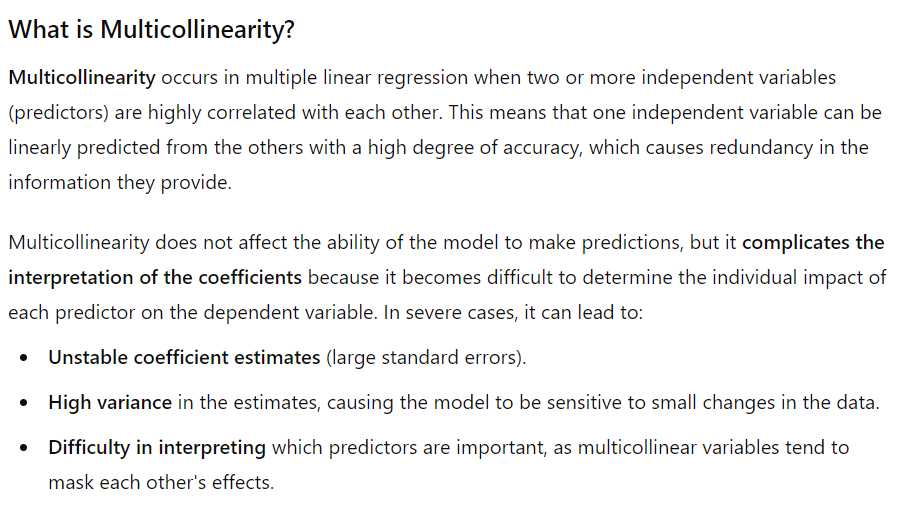

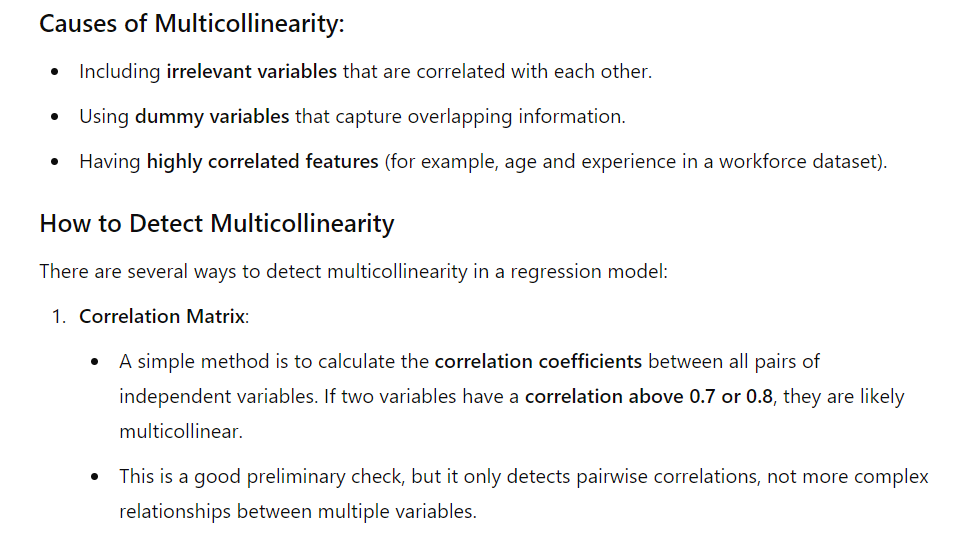

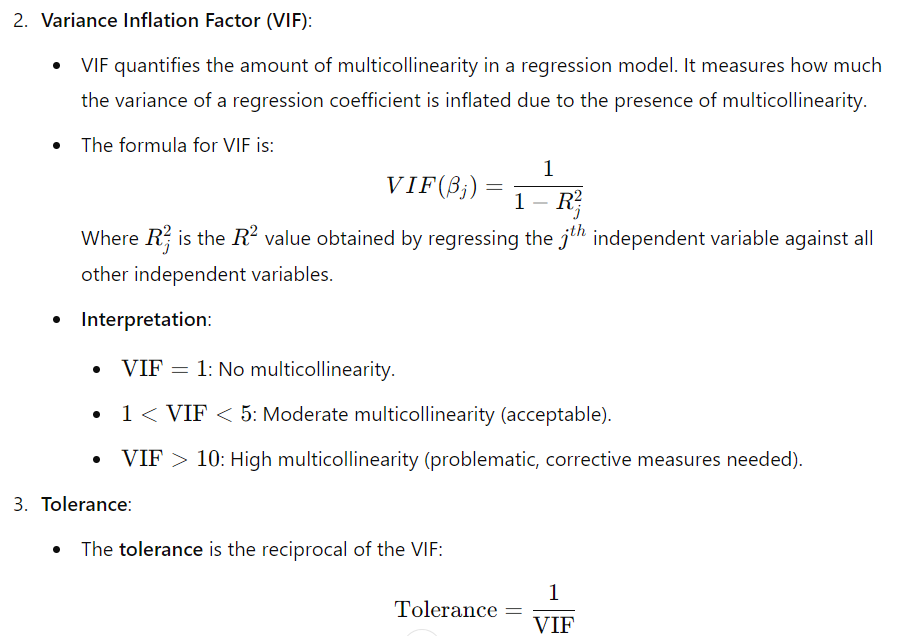

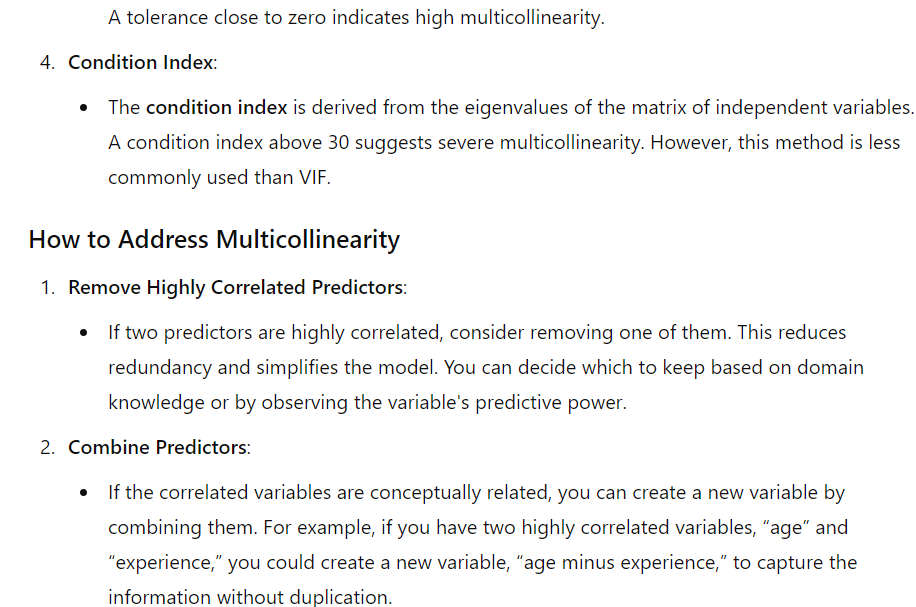

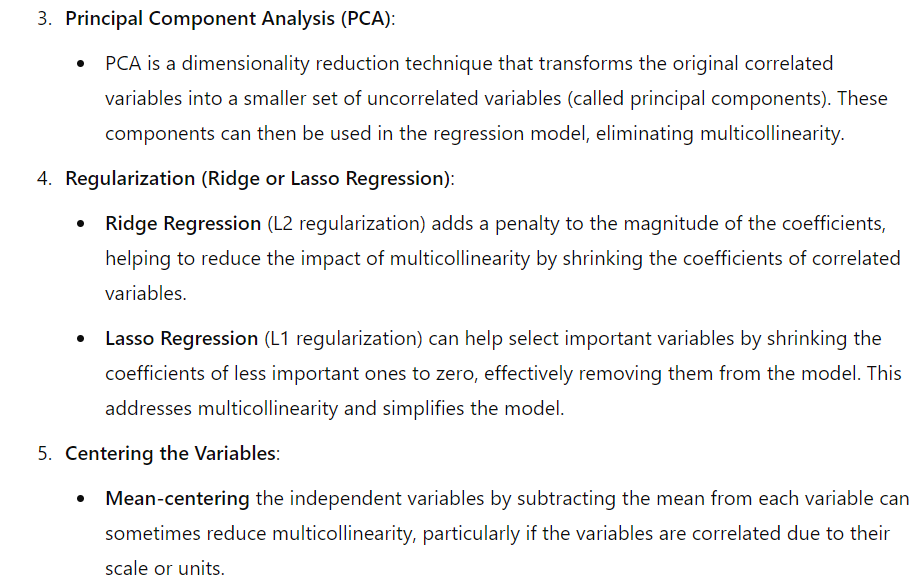

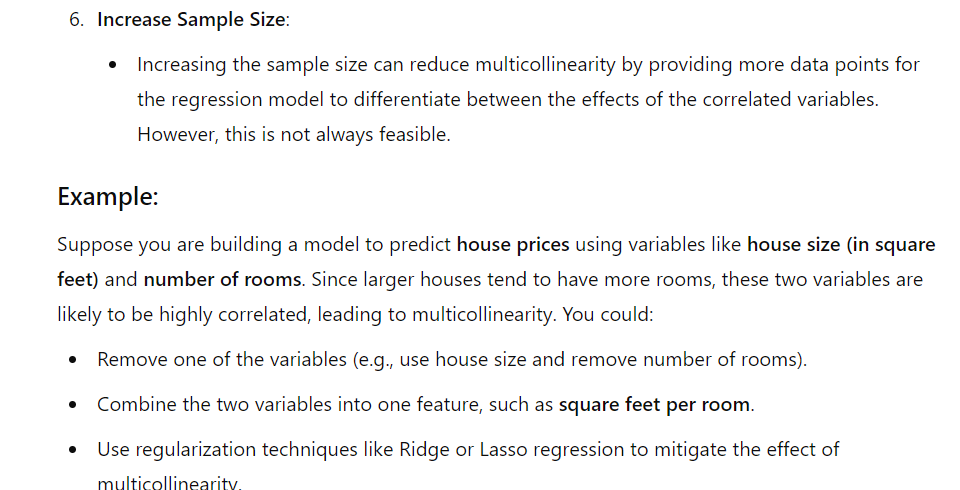

Q7. Describe the polynomial regression model. How is it different from linear regression?

### Polynomial Regression Model

**Polynomial regression** is a type of regression analysis in which the relationship between the independent variable \(x\) and the dependent variable \(y\) is modeled as an \(n^{th}\) degree polynomial. Unlike simple linear regression, which assumes a linear relationship, polynomial regression allows for a curved line to better fit the data.

The general form of a polynomial regression model is:

\[
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \dots + \beta_n x^n + \epsilon
\]

Where:
- \(y\) is the dependent variable.
- \(x\) is the independent variable.
- \(\beta_0, \beta_1, \beta_2, \ldots, \beta_n\) are the coefficients of the polynomial.
- \(n\) is the degree of the polynomial.
- \(\epsilon\) is the error term.

### Key Features of Polynomial Regression
1. **Curved Relationships**: It can model non-linear relationships by including higher-degree terms of the independent variable.
2. **Flexibility**: The degree of the polynomial determines the model's flexibility; higher degrees can fit more complex relationships but also risk overfitting the data.
3. **Complexity**: As the degree of the polynomial increases, the model becomes more complex, which may lead to difficulties in interpretation.

### Differences Between Polynomial Regression and Linear Regression

1. **Form of the Relationship**:
   - **Linear Regression**: Assumes a linear relationship between the independent and dependent variables, expressed in the form \(y = \beta_0 + \beta_1 x + \epsilon\). The graph of this relationship is a straight line.
   - **Polynomial Regression**: Models the relationship as a polynomial, allowing for curves and bends. This is expressed in the form \(y = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots + \beta_n x^n + \epsilon\). The graph can take on various shapes depending on the degree of the polynomial.

2. **Model Complexity**:
   - **Linear Regression**: Generally simpler with fewer parameters to estimate. The coefficients represent constant rates of change.
   - **Polynomial Regression**: More complex, especially at higher degrees, as it can model various inflection points and curvature in the data.

3. **Flexibility**:
   - **Linear Regression**: Limited flexibility; it can struggle to fit data that has a non-linear relationship.
   - **Polynomial Regression**: Greater flexibility; it can fit a wider range of data patterns by adjusting the degree of the polynomial.

4. **Interpretation**:
   - **Linear Regression**: Coefficients have straightforward interpretations, representing the expected change in the dependent variable for a one-unit change in the independent variable.
   - **Polynomial Regression**: Interpretation of coefficients can be more complex, especially for higher-degree terms, as they can represent non-linear effects on the dependent variable.

5. **Overfitting Risk**:
   - **Linear Regression**: Less likely to overfit, but may underfit if the relationship is indeed non-linear.
   - **Polynomial Regression**: Higher degrees can lead to overfitting, where the model captures noise in the data instead of the underlying trend, resulting in poor generalization to new data.

### Example:

1. **Linear Regression Example**:
   Suppose you want to model the relationship between temperature (in degrees Celsius) and ice cream sales. A simple linear regression might produce a model like this:
   \[
   \text{Sales} = \beta_0 + \beta_1 \times \text{Temperature}
   \]
   This suggests that for every degree increase in temperature, sales increase by a constant amount.

2. **Polynomial Regression Example**:
   If the relationship between temperature and ice cream sales is not linear (for instance, sales may increase rapidly at first but plateau at very high temperatures), you could use polynomial regression:
   \[
   \text{Sales} = \beta_0 + \beta_1 \times \text{Temperature} + \beta_2 \times \text{Temperature}^2
   \]
   This allows for a curve in the relationship, providing a better fit to the actual sales data.

 

Q8. What are the advantages and disadvantages of polynomial regression compared to linear
regression? In what situations would you prefer to use polynomial regression?

### Advantages and Disadvantages of Polynomial Regression Compared to Linear Regression

#### Advantages of Polynomial Regression

1. **Modeling Non-linear Relationships**:
   - Polynomial regression can capture more complex relationships between the independent and dependent variables, allowing for curves and bends in the data that linear regression cannot.

2. **Increased Flexibility**:
   - By adjusting the degree of the polynomial, you can create models that fit various shapes of data distributions, which can lead to better predictions when the relationship is non-linear.

3. **Fitting Data with Inflection Points**:
   - Polynomial regression can handle data with multiple inflection points, enabling the model to reflect changes in the trend over different ranges of the independent variable.

4. **Higher Accuracy for Non-linear Data**:
   - When the underlying relationship between the variables is inherently non-linear, polynomial regression can provide more accurate predictions and a better fit to the data.

#### Disadvantages of Polynomial Regression

1. **Overfitting**:
   - Higher-degree polynomials can lead to overfitting, where the model captures noise in the data instead of the underlying trend. This reduces the model's generalizability to new data.

2. **Complexity in Interpretation**:
   - The coefficients of polynomial regression are less intuitive to interpret, especially for higher-degree polynomials, as they do not represent constant rates of change.

3. **Numerical Instability**:
   - High-degree polynomial regression can lead to numerical instability, causing large fluctuations in the predicted values for small changes in the input variable, especially at the edges of the data range (Runge's phenomenon).

4. **Increased Computational Cost**:
   - Polynomial regression requires more computation than linear regression, particularly when determining coefficients for higher-degree polynomials.

5. **Risk of Multicollinearity**:
   - In polynomial regression, especially when including multiple polynomial terms (e.g., \(x\), \(x^2\), \(x^3\)), multicollinearity can become an issue, leading to unreliable coefficient estimates.

### When to Prefer Polynomial Regression

1. **Non-linear Data**:
   - When exploratory data analysis indicates a non-linear relationship between the independent and dependent variables, polynomial regression is preferred.

2. **Presence of Inflection Points**:
   - If the data exhibits changes in direction (e.g., increases and decreases) across the range of the independent variable, polynomial regression can effectively capture these trends.

3. **Limited Sample Size**:
   - In cases where the sample size is limited, polynomial regression can fit the data more flexibly without requiring a large number of predictors.

4. **Predictive Modeling**:
   - When the goal is to achieve the best possible predictions, and the underlying relationship is known to be non-linear, polynomial regression can outperform linear regression.

5. **Visualizing Complex Relationships**:
   - If the objective includes visualization and interpretation of the relationship between variables, polynomial regression can provide a more informative model, especially when presenting to stakeholders.

### Example Scenarios

- **Marketing Analysis**: If you are analyzing the relationship between advertising spending and sales revenue, you may find that after a certain point, additional spending has diminishing returns. A polynomial regression can capture this non-linear effect.
  
- **Biological Studies**: In fields like biology, where growth patterns (e.g., plant growth over time) may follow a non-linear trend, polynomial regression can help in modeling such relationships.

 